In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns

In [13]:
# Load the data
df = pd.read_csv('../data/togo-dapaong_qc.csv')

In [14]:
df.describe()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [16]:
#from df.discribe() we can see that the columns DHI, DNI, GHI, HAVE NEGATIVE VALUES WHICH IS NOT POSSIBLE
#THEREFORE WE CAN DROP THE ROWS WITH NEGATIVE VALUES
# Create a mask for negative values
mask = (df[['DHI', 'DNI', 'GHI']] < 0).any(axis=1)
# Drop rows with negative values
df[['GHI', 'DNI', 'DHI']] = df[['GHI', 'DNI', 'DHI']].clip(lower=0)



In [17]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
print(df["Timestamp"].dtypes)

datetime64[ns]


In [18]:
#find outliers using Z score >3
from scipy.stats import zscore

# 1) Pick your columns
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# 2) Compute Z-scores
z = df[cols].apply(zscore)

# 3) Flag outliers (|Z| > 3)
outliers = (z.abs() > 3.5)


# 4) Count how many outliers per column
outlier_counts = outliers.sum()
print("Outlier counts:\n", outlier_counts)

# 5) (Optional) See which rows have ANY outlier
bad_rows = df[outliers.any(axis=1)]
#print("\nSample rows with at least one outlier:\n", bad_rows.head())


Outlier counts:
 GHI         12
DNI          0
DHI        418
ModA         4
ModB         7
WS        1703
WSgust    1890
dtype: int64


In [23]:
# After processing (e.g., outlier replacement)
df_cleaned = df.copy()  # Optional: work on a copy to preserve original

# Save to CSV
df_cleaned.to_csv('../data/cleaned_Togo_solar_data.csv', index=False)
print("Saved cleaned data to 'cleaned_solar_data.csv'")

Saved cleaned data to 'cleaned_solar_data.csv'


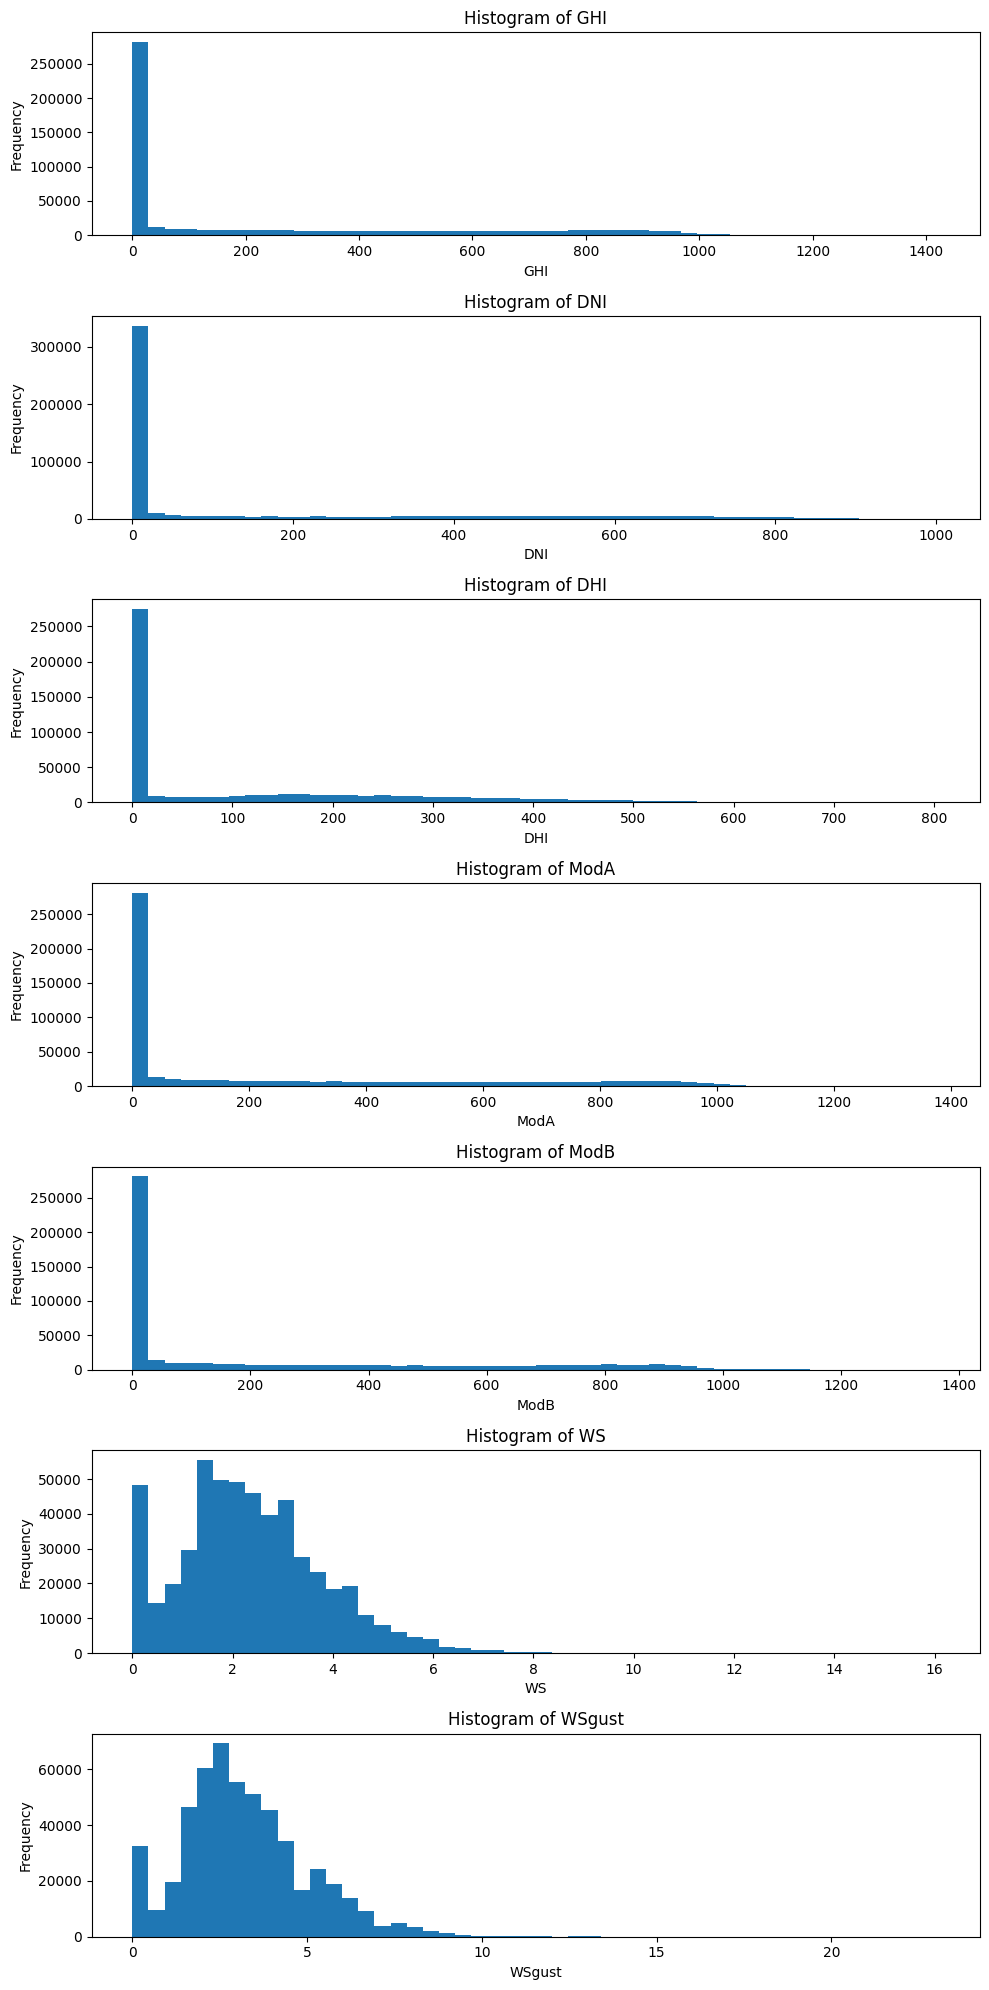

In [26]:
fig, axes = plt.subplots(nrows=len(cols), figsize=(10, 20))  # Adjust size as needed

# Plot histograms for each column
for ax, col in zip(axes, cols):
    df[col].plot.hist(ax=ax, bins=50, title=f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()  # Prevent overlapping labels
plt.show()

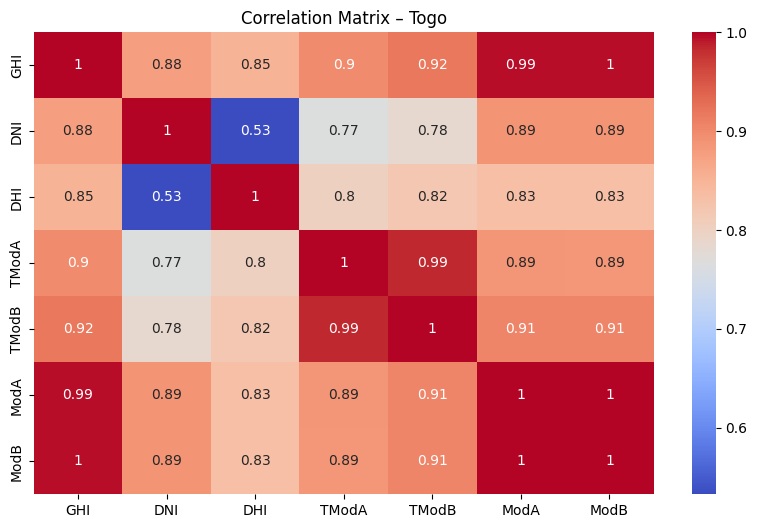

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'ModA', 'ModB']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix – Togo")
plt.show()

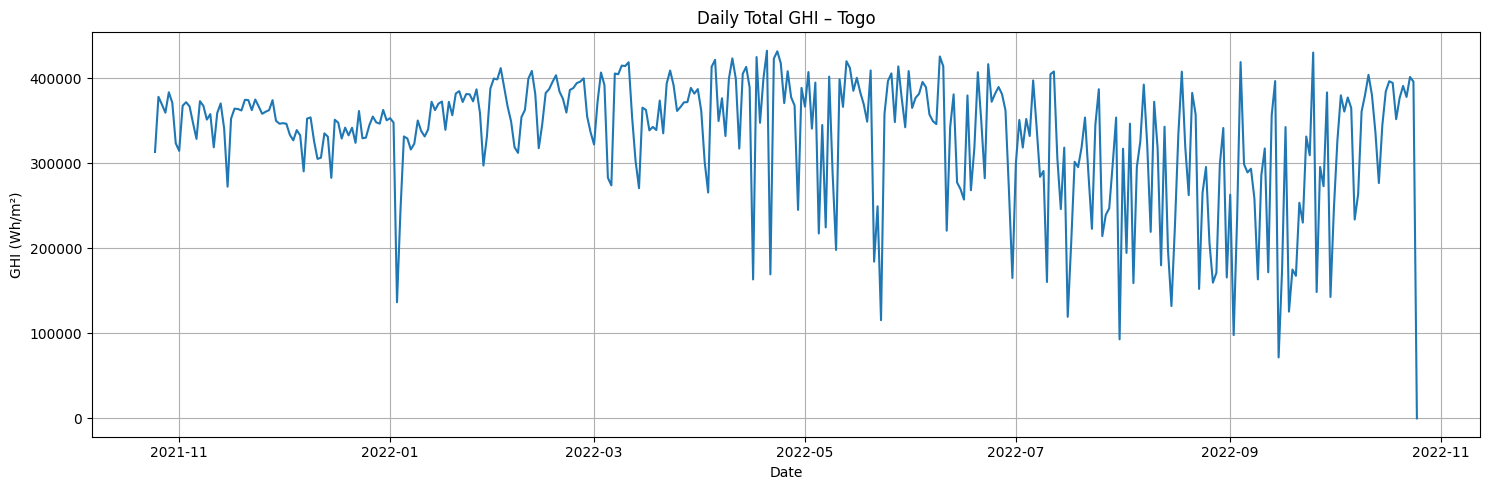

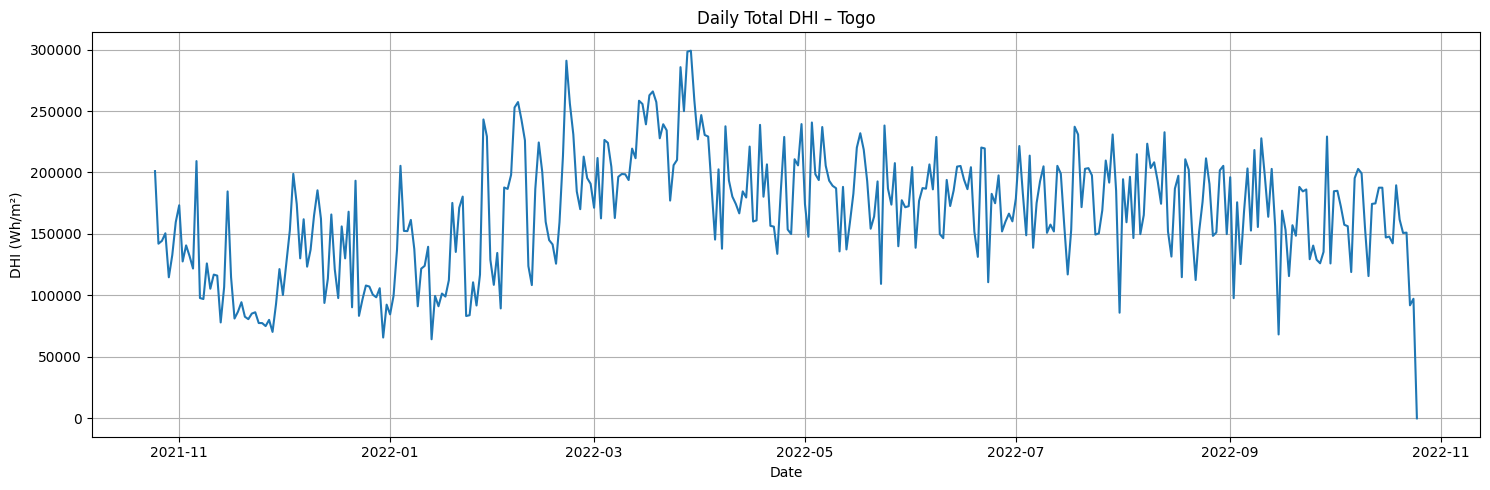

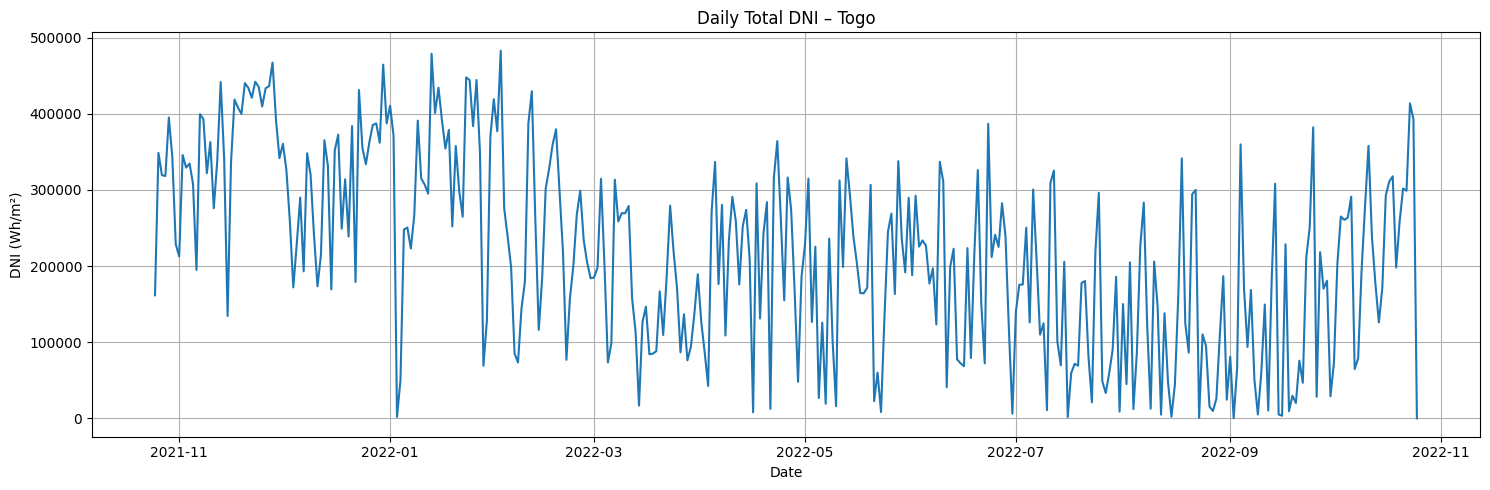

In [21]:


df['Date'] = df['Timestamp'].dt.date
daily_ghi = df.groupby('Date')['GHI'].sum()

plt.figure(figsize=(15,5))
daily_ghi.plot()
plt.title("Daily Total GHI – Togo")
plt.xlabel("Date")
plt.ylabel("GHI (Wh/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()


daily_dhi = df.groupby('Date')['DHI'].sum()
plt.figure(figsize=(15,5))
daily_dhi.plot()
plt.title("Daily Total DHI – Togo")
plt.xlabel("Date")
plt.ylabel("DHI (Wh/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()

Daily_dni = df.groupby('Date')['DNI'].sum()
plt.figure(figsize=(15,5))
Daily_dni.plot()
plt.title("Daily Total DNI – Togo")
plt.xlabel("Date")
plt.ylabel("DNI (Wh/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()

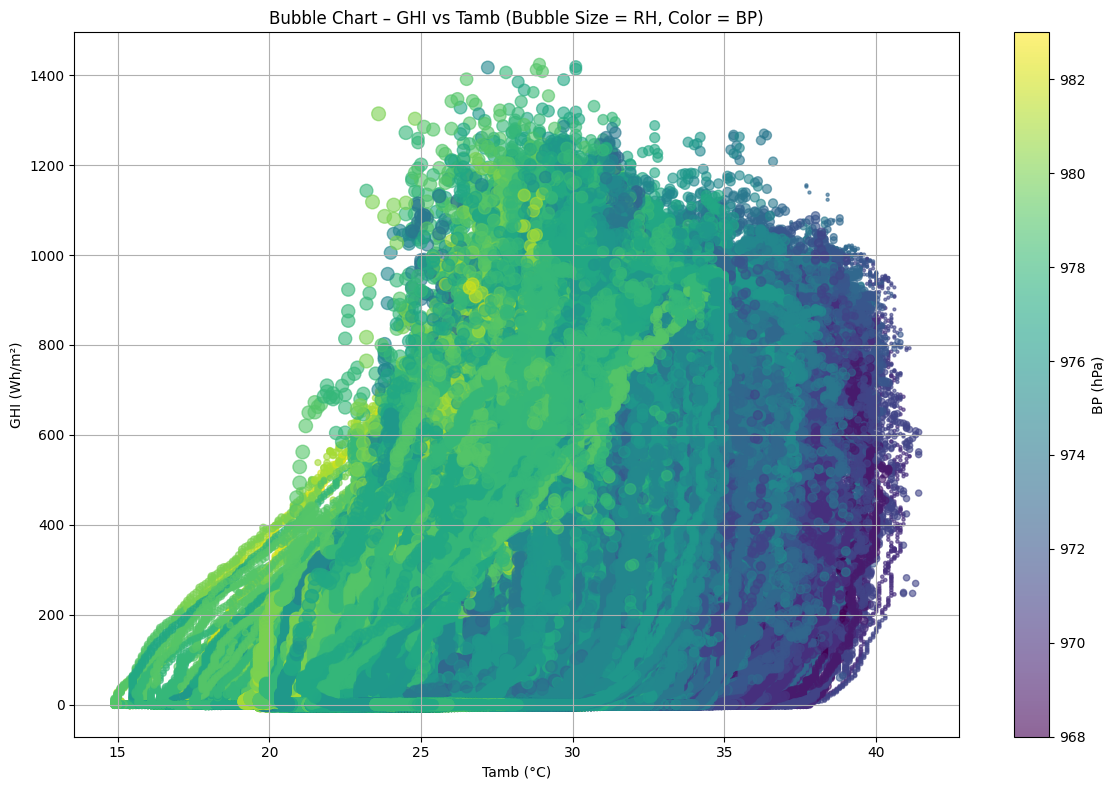

In [25]:
plt.figure(figsize=(12, 8))

# Create the bubble chart
plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], alpha=0.6, c=df['BP'], cmap='viridis')

# Add labels and title
plt.title("Bubble Chart – GHI vs Tamb (Bubble Size = RH, Color = BP)")
plt.xlabel("Tamb (°C)")
plt.ylabel("GHI (Wh/m²)")
plt.colorbar(label="BP (hPa)")  # Color bar for BP
plt.grid(True)

plt.tight_layout()
plt.show()